# Data Generation

Copyright：From UIUC-CS361 Professor：Hongye Liu

In [ ]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10 #number of parameters
data_num = 1000 # number of data
scale = .1 

theta_true = np.ones((dim_theta,1))
theta_true
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [ ]:

'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
# theta_pred = NotImplemented # TODO: Implement the analytical solution
theta_pred  = np.linalg.lstsq(A, y_data, rcond=None)[0]
theta_pred
print('Empirical theta', theta_pred.reshape(-1))

Empirical theta [1.00250879 1.01429    1.01106749 1.00443479 0.99988414 0.9960512
 1.01450626 0.998628   1.01005218 1.00028133]


# SGD Variants Noisy Function

In [ ]:
batch_size = 1
max_iter = 1000 #iterate 1000 times
lr = 0.001 # how much we move in each step 
theta_init = np.random.random((10,1)) * 0.1 

In [ ]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat) #Return an array of zeros with the same shape and type as a given array.
    loss = 0
    
    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_
        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.
        '''
        grad = deg_ * np.sign(err) * abs(err)**(deg_ - 1) * x_ # TODO: Implement the analytical gradient
        l = abs(err)**deg_ # TODO: Implement the loss function
        
        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]
        
    return loss, gradient

# Running SGD Variants

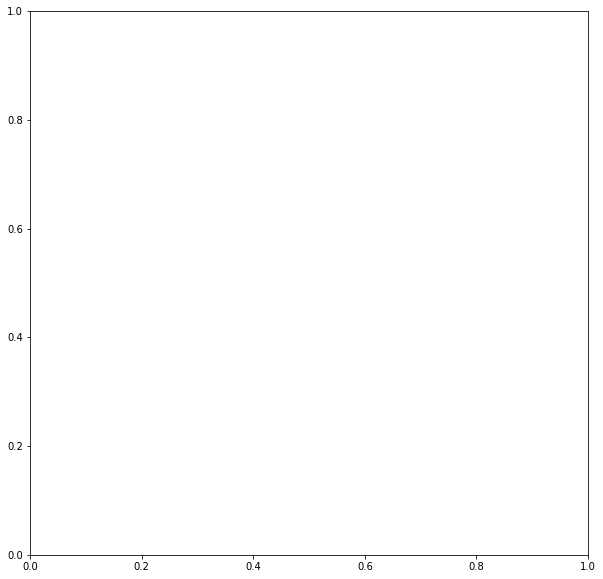

In [ ]:
#@title Parameters
deg_ = 2 #@param {type: "number"}
# different degree generate different curves, thus degree can be 0.4, 0.7 etc.
num_rep = 30 #@param {type: "integer"}
# if overlap exists, num_rep can be increased to 30, 50, 100.
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}

adam 0
adam 20
adam done
Theta: [[0.33055924]
 [0.31013006]
 [0.31081029]
 [0.33939963]
 [0.32644212]
 [0.31224556]
 [0.38773275]
 [0.30159401]
 [0.39984265]
 [0.27545293]]
[2.7091631  2.62665702 2.54526179 2.46642159 2.38589596 2.31363648
 2.24097836 2.16932361 2.10159765 2.03265203 1.96187478 1.89829834
 1.83603084 1.77236468 1.71125401 1.65327643 1.59569516 1.53812357
 1.48277136 1.43141943]
sgd 0
sgd 20
sgd done
Theta: [[0.52630156]
 [0.55984962]
 [0.50099305]
 [0.50725876]
 [0.5698562 ]
 [0.34540421]
 [0.47753624]
 [0.40180611]
 [0.53490133]
 [0.44227777]]
[2.7091631  2.54237289 2.3916607  2.24749406 2.11745221 1.98810791
 1.86924393 1.75164189 1.64108454 1.54238042 1.44241968 1.35394155
 1.27300727 1.19149026 1.11884826 1.04697149 0.98618239 0.92825014
 0.87222697 0.81825898]
adagrad 0
adagrad 20
adagrad done
Theta: [[0.06012007]
 [0.06850065]
 [0.03902417]
 [0.07057143]
 [0.06847579]
 [0.05983121]
 [0.08999844]
 [0.03558415]
 [0.1001843 ]
 [0.03971391]]
[2.7091631  2.69013633 2.

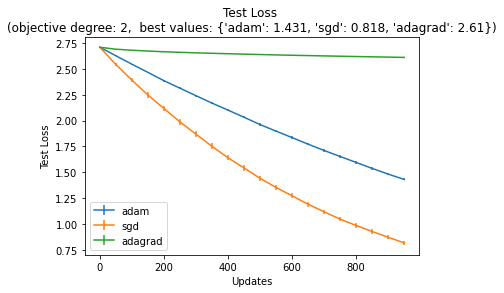

In [ ]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []
    
    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)
            
        if method == 'adam':
            #print('Adam Not implemented.!!!')
            beta_1 = 0.9
            beta_2 = 0.999
            m = 0 # TODO: Initialize parameters
            v = 0
            epsilon = 10**(-8)

        if method == 'adagrad':
            #print('Adagrad Not implemented.!!!')
            epsilon = 10**(-8) # TODO: Initialize parameters
            squared_sum = 0
            
        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)
            
            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)                
            
            if method == 'adam':
                #print('Adam Not implemented.') # TODO: Implement Adam
                m = beta_1 * m + (1 - beta_1) * gradient
                v = beta_2 * v + (1 - beta_2) * (gradient**2)
                m_hat = m / (1 - beta_1**(t+1))
                v_hat = v / (1 - beta_2**(t+1))
                theta_hat = theta_hat - lr * m_hat / (np.sqrt(v_hat) + epsilon)
            
            elif method == 'adagrad':
                #print('Adagrad Not implemented.')
                squared_sum = squared_sum + gradient**2 # TODO: Implement Adagrad
                theta_hat = theta_hat - lr * gradient / np.sqrt(squared_sum + epsilon)
                
            # squared_sum ** 2
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient
                
        
        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
        
    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]
    
    #print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    #print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)
    print("Theta:", theta_hat)
    
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis=0) # TODO: Calculate the mean test loss
    print(test_loss_mean)
    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0 
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se = np.std(test_loss_np, axis = 0) / np.sqrt(num_rep) # TODO: Calculate the standard error for test loss

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label= method)
    best_vals[method] = min(test_loss_mean)
    best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
    plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.xlabel('Updates')

No handles with labels found to put in legend.


Text(0.5, 0, 'Updates')

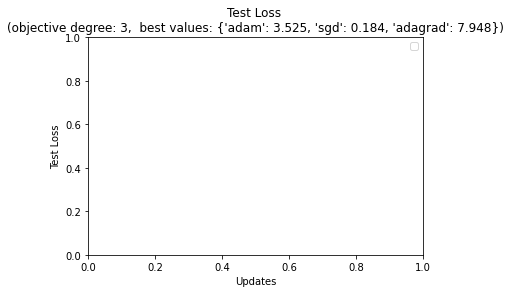

In [ ]:
best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')